### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

### Read Data from CSV file

In [2]:
df = pd.read_csv('BTC-USD.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


### Checking for NAN and/or NULL entries

In [3]:
df.isna().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

### Drop NAN Entries

In [4]:
df = df.dropna()

### Drop useless Columns

In [5]:
df = df.drop(columns=['Adj Close'])

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


### Defining Market Cap

In [7]:
df['Market Cap'] = df['Open'] * df['Volume']

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,9.809605e+09
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,1.575399e+10
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,1.608186e+10
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,1.454907e+10
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,1.084694e+10


### Plotting Stock Data

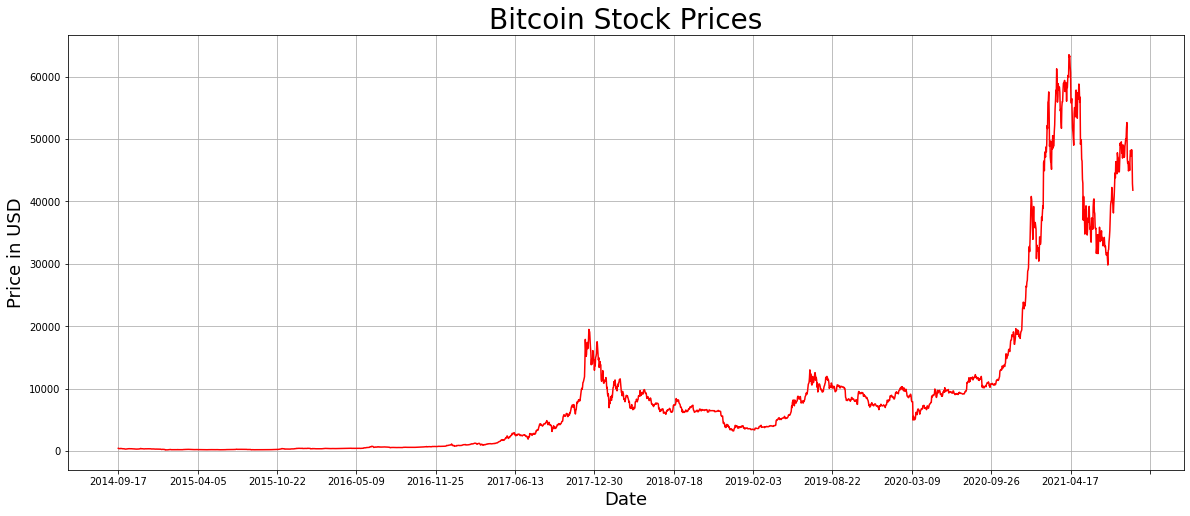

In [9]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='18')
ax.set_ylabel('Price in USD', fontsize='18')
plt.title('Bitcoin Stock Prices', fontsize='28')
plt.grid()
plt.show()

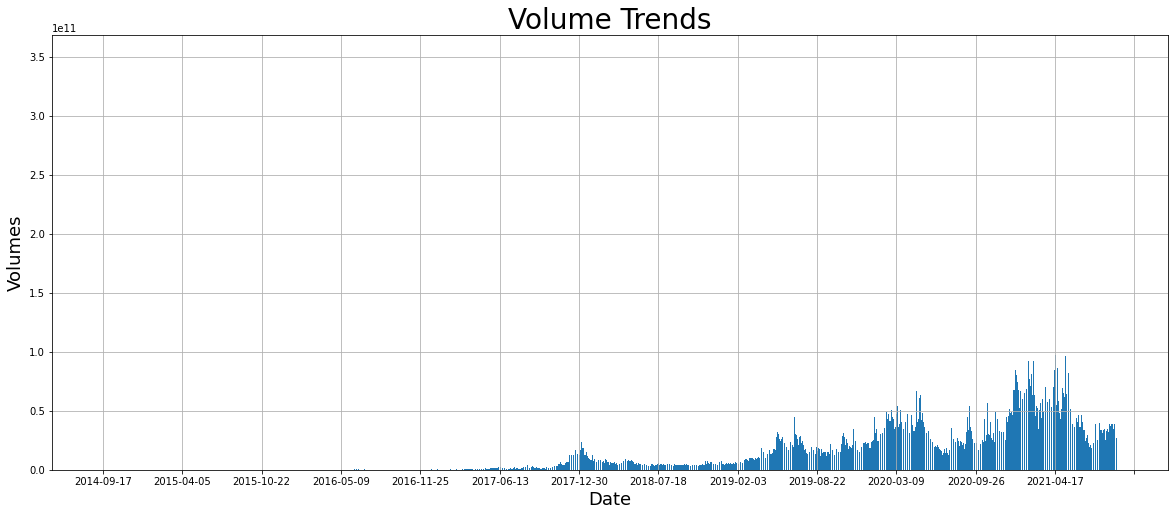

In [10]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df['Date'], df['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='18')
ax.set_ylabel('Volumes', fontsize='18')
plt.title('Volume Trends', fontsize='28')
plt.grid()
plt.show()

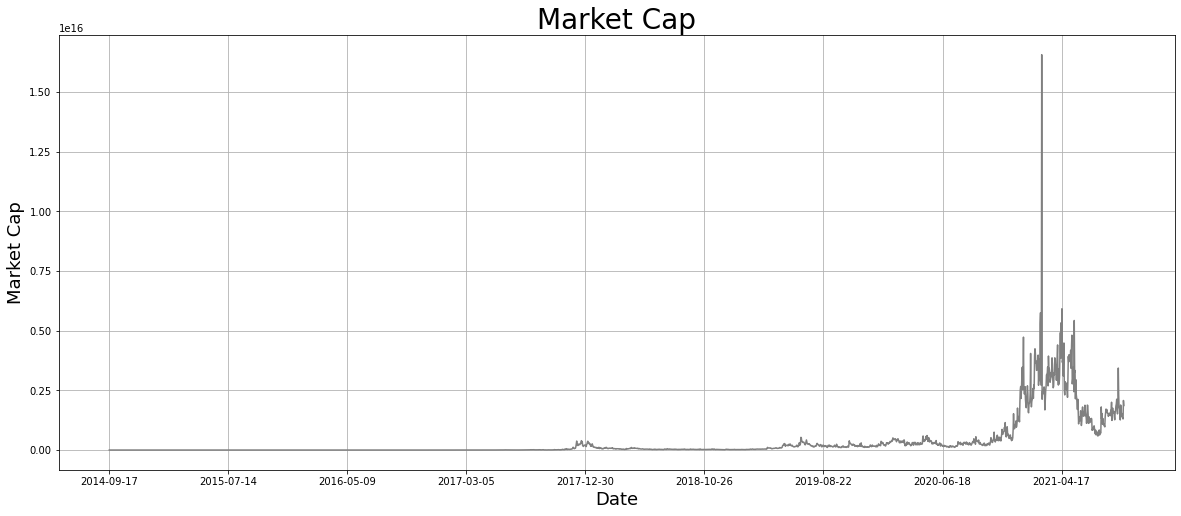

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Market Cap'], color='grey')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date', fontsize='18')
ax.set_ylabel('Market Cap', fontsize='18')
plt.title('Market Cap', fontsize='28')
plt.grid()
plt.show()

In [12]:
df['Volume'] = (df['Close'] / df['Close'].shift(1)) - 1

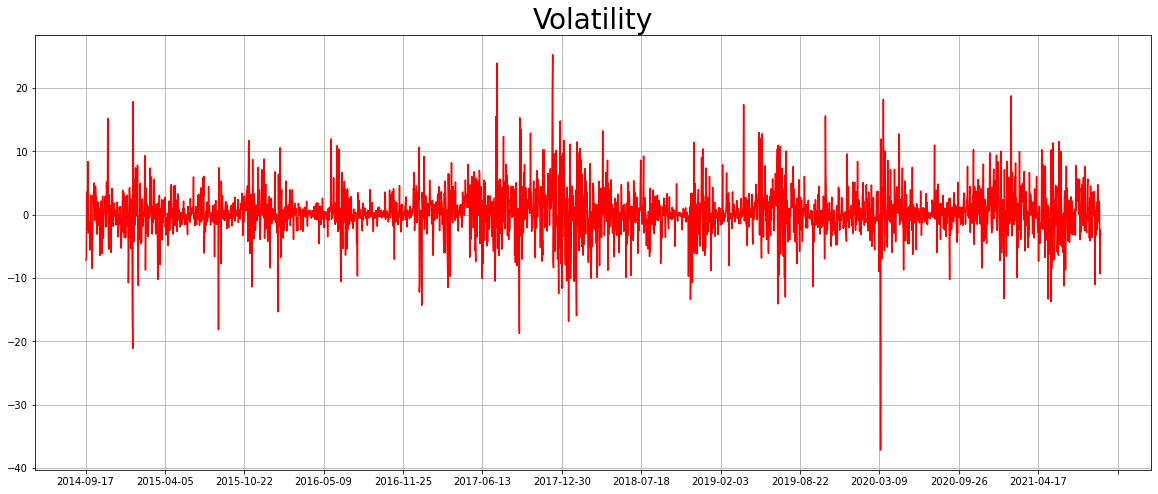

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Volume'] * 100, color='red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility', fontsize='28')
plt.grid()
plt.show()

In [14]:
df['Cumulative Return'] = (1 + df['Volume']).cumprod()

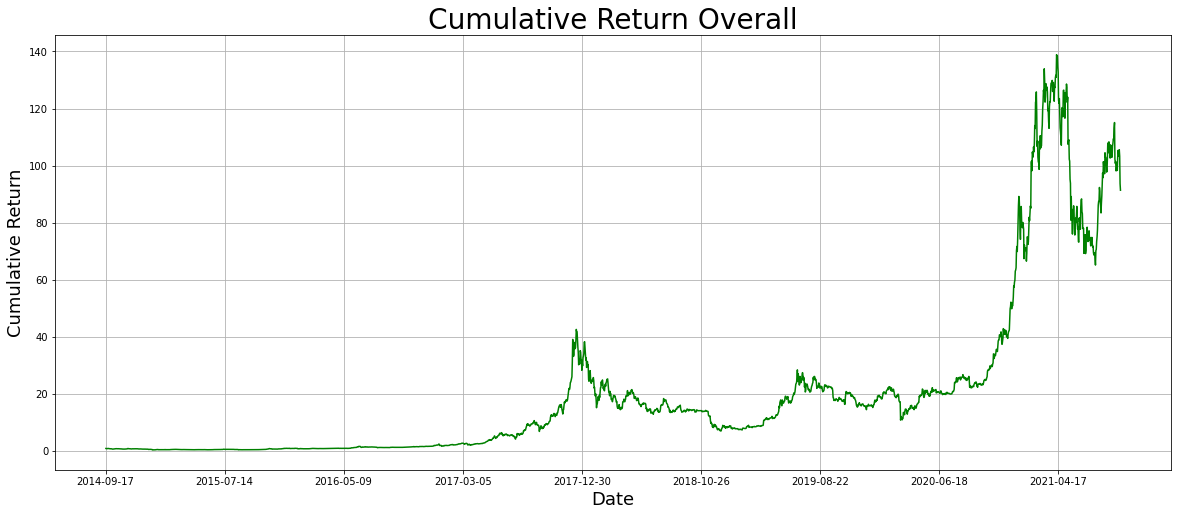

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date', fontsize='18')
ax.set_ylabel('Cumulative Return', fontsize='18')
plt.title('Cumulative Return Overall', fontsize='28')
plt.grid()
plt.show()

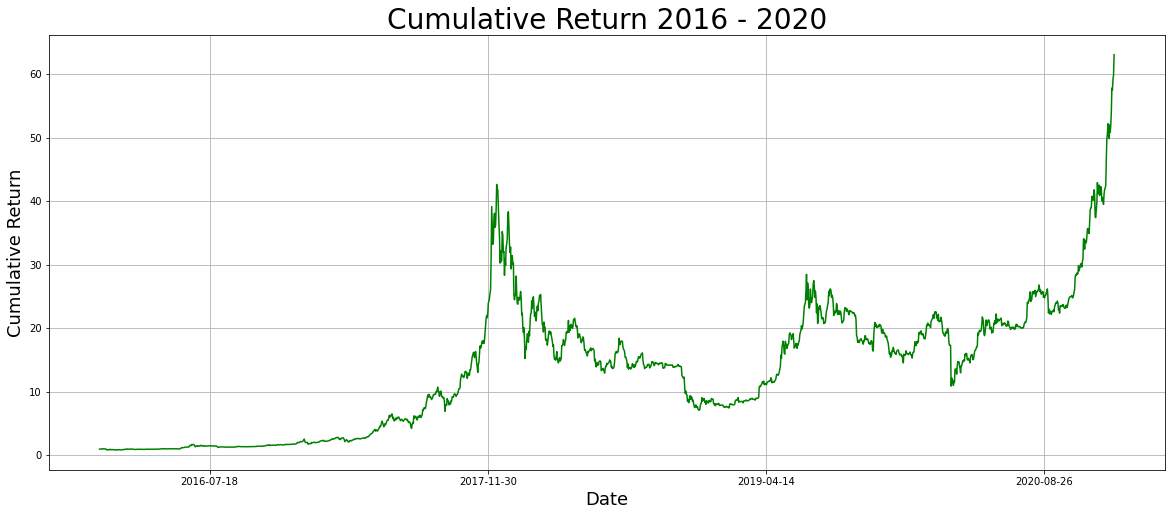

In [16]:
croa = df[(df['Date'] > '2016-01-01') & (df['Date'] < '2020-12-31')]
croa = croa.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
croa['Date'] = pd.to_datetime(croa['Date'], format='%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(croa['Date'], croa['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='18')
ax.set_ylabel('Cumulative Return', fontsize='18')
plt.grid()
plt.title('Cumulative Return 2016 - 2020', fontsize='28')
plt.show()

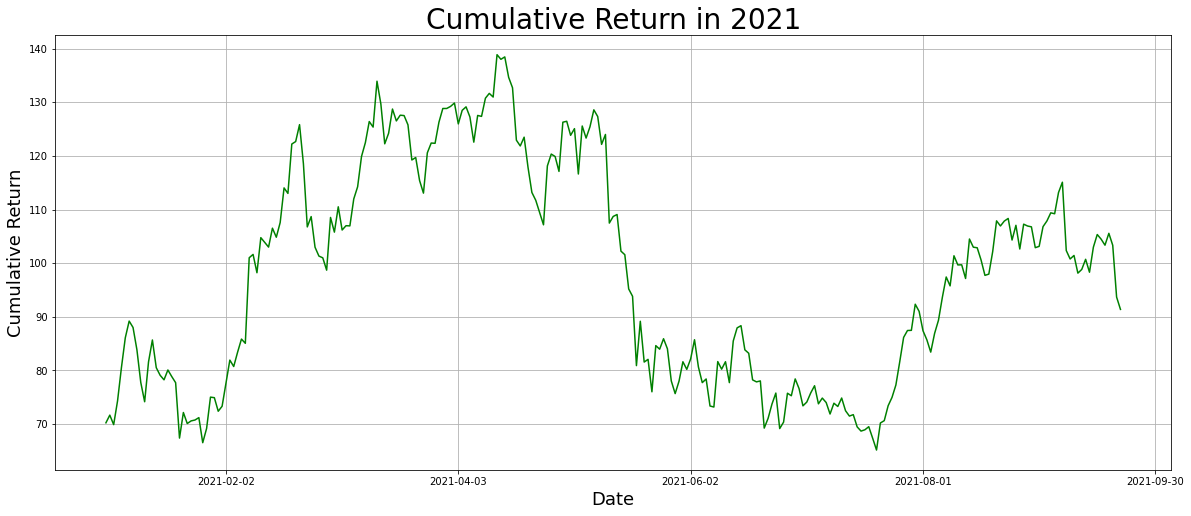

In [17]:
croa = df[(df['Date'] > '2021-01-01')]
croa = croa.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Cumulative Return']]
croa['Date'] = pd.to_datetime(croa['Date'], format='%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(croa['Date'], croa['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='18')
ax.set_ylabel('Cumulative Return', fontsize='18')
plt.grid()
plt.title('Cumulative Return in 2021', fontsize='28')
plt.show()